# ECE 269 Final Project: Face Recognition Using principle Component Analysis
### by Shivani bhakta
#### December 17, 2020

This project is an implementation of the following paper:  
<b>M. A Turk and A. P. Pentland, “Face Recognition Using Eigenfaces", Proceedings of IEEECVPR 1991.</b>    
In this project, we use priciple component analyis (PCA) for Face Recognition

## Importing useful libraries

In [1]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt

## Loading the Image Data

`get_faces(n)` takes in the number of images to be loading from the files and outputs two numpy arrays of both neutral and smiling faces data points. Input and output required are in the docstring. 

In [2]:
def get_faces(n):
    '''
    input: 
        n: number of images to load from the folder. 
    output: 
        neutral_faces: numpy array with each column corresponds to a data point(each image of neutral faces) 
        smiling_faces: numpy array with each column corresponds to a data point(each image of smiling faces)
    '''
    assert isinstance(n,int)
    assert n <= 200 and n>= 1
    
    path_to_folder = "./frontalimages_spatiallynormalized_cropped_equalized/"

    neutral_faces = np.zeros((n,31266))
    smiling_faces = np.zeros((n,31266))

    for i in range(1,n+1):
        # getting neutral faces
        # create the numpy array for the data. 
        # each row will be a data point for each image
        image_path = str(i) + "a.jpg"
        p = Image.open(str(path_to_folder) + image_path)        
        size = p.size 
        p = np.array(p) 
        neutral_faces[i-1,:] = p.reshape(size[0] * size[1])

        
        # getting smiling  faces
        image_path = str(i) + "b.jpg"
        p = Image.open(str(path_to_folder) + image_path)
        p = np.array(p) 
        smiling_faces[i-1,:] = np.reshape(p,(size[0] * size[1]))   
    return neutral_faces,smiling_faces                                       

Excecuting the `get_faces(n)` function to load the 200 images into the variables `neutral_faces` and `smiling_faces`, each corresponding to the set of neutral and smiling face images respectively. 

In [3]:
neutral_faces,smiling_faces = get_faces(200)
# now each column is data for each image i.e. 200 columns (test will test this)
neutral_faces = np.transpose(neutral_faces)
smiling_faces = np.transpose(smiling_faces)

##### Next Block of code is just a test  

Added a test function which recontructs the original images from the numpy array to check the data was loaded correctly!  

(31266, 200)
(31266, 200)


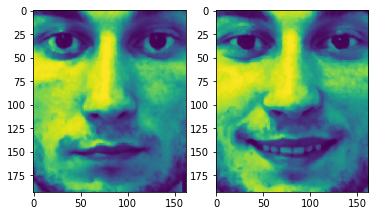

In [4]:
def test(neutral_faces,smiling_faces,n): 
    '''
    Function to test that I am able to recontruct the original image with after all the reshaping and shaping.
    Checking the dimensions and shape as well. 
    '''
    print(neutral_faces.shape)
    print(smiling_faces.shape)
     
    plt.subplot(1,2,1)
    plt.imshow((neutral_faces[:,n]).reshape((193, 162)))
    plt.subplot(1,2,2)
    plt.imshow((smiling_faces[:,n]).reshape((193, 162)))
        
test(neutral_faces,smiling_faces,1)  #Executing test function   

## Principal Component Analysis 
Note: Variables `neutral_faces` and `smiling_faces` have data from all 200 images, but we want to separate training and testing set. 

Let     $ \Gamma = [\Gamma_1, \Gamma_2, \Gamma_3 ... \Gamma_M]$ be a training set of face images, where M is number of face images.(we will be using first 190 images). Each data point (i.e. $ \Gamma_i $ for i = 1,2,3...,M are of size N. N is the number of pixels in each image. (it is `193 x 162 = 31266` for our images). The average face of the set is defined by the vector $ \Psi = \frac{1}{M}\sum_{n=1}^{M} \Gamma_n $. Once we find the mean face we will subtract the average/mean face from the original faces to get the zero centered data set. This new set of data is $ \Phi = [\Phi_1, \Phi_2, \Phi_3 ... \Phi_M]$ where, $ \Phi_i = \Gamma_i - \Psi_i$ . 


$ \Phi $ is the set of data then we will use for PCA. The Goal of PCA is to find the eigenvalues $ \lambda_i $ and its corresponding eigenvectors $ u_i $ which best describes the data. All the Eigenvectors in $ u $ and all values in $ \lambda $ are of the Covariance Matrix: $ C = \frac{1}{M}\sum_{n=1}^{M} \Phi_n \Phi_{n}^{T}$    (i.e. $ C = A A^{T} $)


Like mentioned before our training set images are of `193 x 162 = 31266` Pixels. Therefore, our $ \Phi_i $ is of length `31266`. So Computing covaraiance matrix of $ C = A A^{T} $ will be of `31266 x 31266` size, which will be a lot of computation power. Therefore, we will use the $ C = A^{T}A $ instead, which will be of length M x M (M = 190 of face images). This will do the same work as we wanted, because the eigenvectors of the $ A A^{T} $  are just $ A $ times the eigenvectors of  $ A^{T}A $. 

**Using SVD Function for eigendecomposition**

Built in svd function of python linear algebra library outputs $u, s, vh$, where $u$ are the eigenvectors of covariace matrix $ C = A^{T} A $ and $ s $ are the singular values ordered from highest to the lowest in Magnitude. 

Since eigenvectors of $ A A^{T} $  are just $ A $ times the eigenvectors of  $ A^{T}A $. To get the eigenvectors (also called as eigenfaces in paper) of $ A A^{T} $, we will do following: `eigenfaces = ` $ \frac{\Phi u}{ \| \Phi u \| }$   







**To Summarize, we will follow following steps using the method described above to find the Principal Components (aka eigenfaces)**

***Step 1***: *Standardization of the data*

  - Zero-centered (subtract mean from each element)

***Step 2***: *Computing the covariance Matrix* 

***Step 3***: *Calculating the Eigenvectors and Eigenvalues*

***Step 4***: *Computing the Principal Components (PC)*  

## *STEP 1* : Training set, Finding the mean and Zero-centered Data 

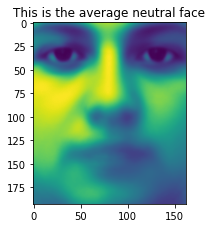

In [5]:
# Computing the mean of neutral_faces[:,0:190] i.e, first 190 columns
# T: Training Set
T = neutral_faces[:,0:190]
size_T = T.shape # [31266 190]
# print(size_T[0], size_T[1]) 

#####################  Find the mean ######################
mean = (np.transpose(np.sum(T,axis = 1))).reshape(size_T[0],1) * (1/size_T[1])

plt.subplot(1,2,1)
plt.imshow((mean).reshape((193, 162)))
plt.title("This is the average neutral face")
# plt.savefig('average_neutral_face.png')

##################### Zero_centered_T = A (as defined in the paper) ####################
# subtracting the mean from all the data points.
Zero_centered_T = T - mean  

## *STEP 2-4* : Computing the Covariance Matrix, Eigenfaces and Eigenvalues 

Cov Matrix Shape:  (190, 190)
u shape (190, 190)
s shape (190,)


Text(0.5, 1.0, 'PC 3')

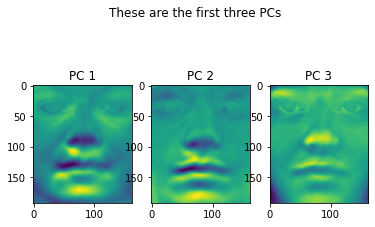

In [6]:
#####################  Find the covariance #####################
cov = np.dot(np.transpose(Zero_centered_T), Zero_centered_T) # C = transpose(A)*A
print("Cov Matrix Shape: ", cov.shape)
u,s,vh = np.linalg.svd(cov)
eigen_faces = np.dot(Zero_centered_T,u)
eigen_faces /= np.linalg.norm(eigen_faces,axis = 0)
print("u shape", u.shape)
print("s shape", s.shape)

# # eigenfaces
# plt.figure()
# plt.subplot(1,3,1)
# plt.imshow((eigen_faces[:,0]).reshape((193, 162)))
# plt.subplot(1,3,2)
# plt.imshow((eigen_faces[:,1]).reshape((193, 162)))
# plt.subplot(1,3,3)
# plt.imshow((eigen_faces[:,2]).reshape((193, 162)))
# plt.suptitle("These are the first three PCs")

## test 
fig,(ax1,ax2,ax3) = plt.subplots(1,3)
fig.suptitle('These are the first three PCs')
ax1.imshow((eigen_faces[:,0]).reshape((193, 162)))
ax1.set_title('PC 1')
ax2.imshow((eigen_faces[:,1]).reshape((193, 162)))
ax2.set_title('PC 2')
ax3.imshow((eigen_faces[:,2]).reshape((193, 162)))
ax3.set_title('PC 3')

## Part A
**Question:** Compute the principal components (PCs) using first 190 individuals’ neutral expres- sion image. Plot the singular values of the data matrix and justify your choice of principal components.

**My explanation:** 

Principal Components (PCs) were computed in previous block of code. 

Below is the plot for the singular values of the data matrix. 

For the choice of PCs, I would probably use somewhere between 50-60 PCs for the reconstruction of the images because as it can be seen from the plot below, the singular values are not varying as much after that number and they are the accurate representation how much those features contribute towards the accurate projection or recontruction of the images (They gives us most of the weigths needed).   

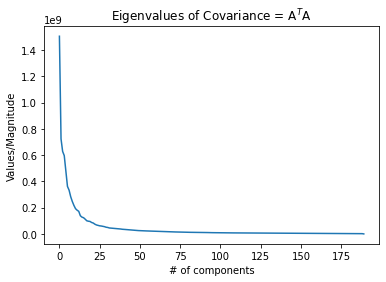

In [8]:
plt.plot(s)
plt.xlabel("# of components")
plt.ylabel("Values/Magnitude")
plt.title("Eigenvalues of Covariance = A$^{T}$A")
plt.show()

**Method used to Image Reconstruction (again taken from the paper)**

For an image $ \Gamma $, it could be transformed into its eigenface components by 
$ \omega_k = u_{k}^{T} [\Gamma - \Psi] $ for k = 1, 2, ....,$ M'$. Here $ M'$ = # of PCs you are using.

- Note: 
    - $u_{k}$ = eigenfaces
    - The average face of the set is defined by the vector $ \Psi = \frac{1}{M}\sum_{n=1}^{M} \Gamma_n $ (it was defined as `mean` in my code before )


From $ \Gamma $ image and the eigenfaces first ($1,2,3,...,M'$), the image can be reconstructed by using
$ \Phi = \Gamma - \Psi $  , and  $ \Phi_f = \sum_{i=1}^{i=M'}  \omega_i u_i $  as  $ \hat{\Gamma} = \Phi + \Psi$

**Mean Squared Error (MSE) Computation** 

MSE = $\frac{1}{N} \sum_{i=1}^{N} (\hat{\Gamma_i} - \Gamma_i)^2 $ 

Here N = `193 x 162 = 31266` (Pixels) for our images



## Part B
**Question:** 

Reconstruct one of 190 individuals’ neutral expression image using different number of PCs. As you vary the number of PCs, plot the mean squared error (MSE) of reconstruction versus the number of principal components to show the accuracy of reconstruction. Comment on your result.

**My Explanation:**

I choose the very first image among the smiling faces to reconstruct using different PCs. Below are the Reconstructed Images using PCs = [25,50,80,100,150,190], and the method described above for the reconstruction. 

As it can be seen from the images, as the principal components used to recontruct the images increase, the Mean Squared Error Decreases and the images start look more like the original Image.

However, you can from the Reconstructed images that we do not really need all the PCs to accurately reconstruct the images. We only really need 50 PCs. 

In [9]:
# using the first image to for reconstruction neutral_faces[:,0] 
def recontruction(T, PCs, eigen_faces,mean): 

    i = PCs 
    new_eigen_faces = eigen_faces[:,0:i]
    # weights
    W = np.dot(np.transpose(new_eigen_faces), T - mean)
    
    T_hat = np.zeros([T.shape[0],T.shape[1]])
    #T_hat = phi + mean
    # get phi_f = sum(w_i * u_i)
    f = np.dot(new_eigen_faces,W)
    T_hat = f + mean
    
    return T_hat

def mean_squared_error(T, eigen_faces,mean): 
    error = np.zeros([190,1])
    for i in range(0,190):
        T_hat = recontruction(T, i, eigen_faces,mean)
        d = T_hat - T
#         d = np.square(d)
#         error[i] =  ( np.sum(s) )* (1/(i+1))
        error[i] =  ( np.sum(d**2) )/d.shape[0]
    return error

Original Image Shape:  (31266, 1)
Mean_vector shape:  (31266, 1)
(31266, 1)


Text(0.5, 1.0, 'Reconstructed using 190 PCs')

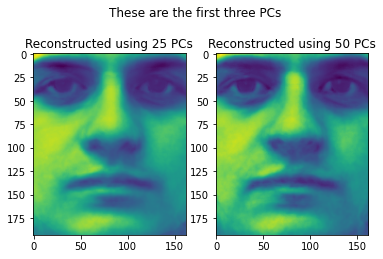

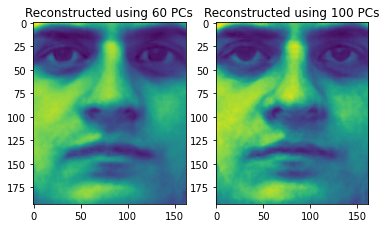

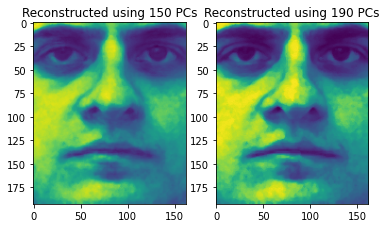

In [10]:
T_test = neutral_faces[:,0].reshape((mean.shape[0],mean.shape[1]))
print("Original Image Shape: ",T_test.shape )
print("Mean_vector shape: ", mean.shape)


## Reconstructed Images with 25 and 50 PCs
fig,(ax1,ax2) = plt.subplots(1,2)
fig.suptitle('These are the first three PCs')
T_hat = recontruction(T_test, 25, eigen_faces,mean)
print(T_hat.shape)
ax1.imshow((T_hat).reshape((193, 162)))
ax1.set_title("Reconstructed using 25 PCs")

T_hat = recontruction(T_test, 50, eigen_faces,mean)
ax2.imshow((T_hat).reshape((193, 162)))
ax2.set_title("Reconstructed using 50 PCs")

## Reconstructed Images with 80 and 100 PCs
fig,(ax3,ax4) = plt.subplots(1,2)
T_hat = recontruction(T_test, 60, eigen_faces,mean)
ax3.imshow((T_hat).reshape((193, 162)))
ax3.set_title("Reconstructed using 60 PCs")

T_hat = recontruction(T_test, 100, eigen_faces,mean)
ax4.imshow((T_hat).reshape((193, 162)))
ax4.set_title("Reconstructed using 100 PCs")

## Reconstructed Images with 80 and 100 PCs
fig,(ax5,ax6) = plt.subplots(1,2)
T_hat = recontruction(T_test, 150, eigen_faces,mean)
ax5.imshow((T_hat).reshape((193, 162)))
ax5.set_title("Reconstructed using 150 PCs")

T_hat = recontruction(T_test, 190, eigen_faces,mean)
ax6.imshow((T_hat).reshape((193, 162)))
ax6.set_title("Reconstructed using 190 PCs")
# plt.figure(figsize(15,15))


(190, 1)


Text(0.5, 1.0, 'Mean Squared Error')

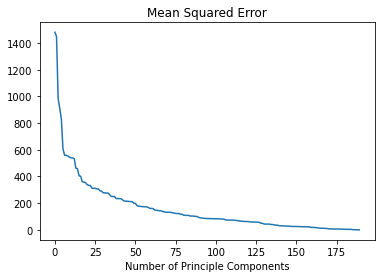

In [11]:
error = mean_squared_error(T_test, eigen_faces,mean)
print(error.shape)
plt.plot(error)
plt.title("Mean Squared Error - Neutral Face")
plt.xlabel("Number of Principle Components")
plt.title("Mean Squared Error")

## Part C
**Question:** 

Reconstruct one of 190 individuals’ smiling expression image using different num- ber of PCs. Again, plot the MSE of reconstruction versus the number of principal components and comment on your result.

**My Explanation:**

I choose 200th image among the neutral faces to reconstruct using different PCs. Below are the Reconstructed Images using PCs = [25,50,80,100,150,190], and the method described above for the reconstruction. 

As it can be seen from the images, as the principal components used to recontruct the images increase, the Mean Squared Error Decreases and the images start look more and more like the original Image. 

In this case, however, when the Principal components were computed only the Neutral Faces were used. Hence trying to reconstruct a smiling face gives higher error as expected as well as the images are close approximation instead of being identical when PCs = 190. 

Moreover, For Part B, we only really needed 50-60 PCs to accurately reconstruct the original images, but for smiling faces we will probably need more Principal Components, probably up to 150 or more. 

Original Image Shape:  (31266, 1)
Mean_vector shape:  (31266, 1)
(31266, 1)


Text(0.5, 1.0, 'Reconstructed using 190 PCs')

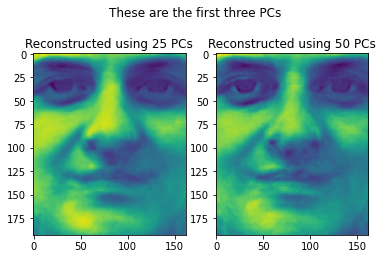

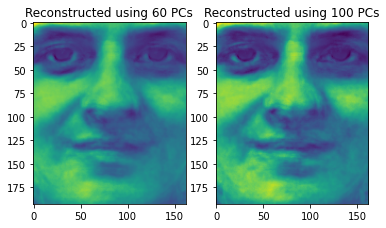

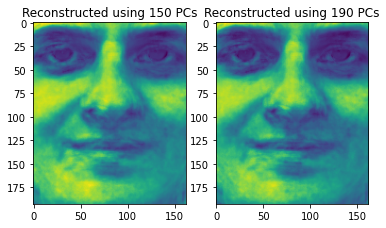

In [12]:
T_test = smiling_faces[:,0].reshape((mean.shape[0],mean.shape[1]))
print("Original Image Shape: ",T_test.shape )
print("Mean_vector shape: ", mean.shape)


## Reconstructed Images with 25 and 50 PCs
fig,(ax1,ax2) = plt.subplots(1,2)
fig.suptitle('These are the first three PCs')
T_hat = recontruction(T_test, 25, eigen_faces,mean)
print(T_hat.shape)
ax1.imshow((T_hat).reshape((193, 162)))
ax1.set_title("Reconstructed using 25 PCs")

T_hat = recontruction(T_test, 50, eigen_faces,mean)
ax2.imshow((T_hat).reshape((193, 162)))
ax2.set_title("Reconstructed using 50 PCs")

## Reconstructed Images with 80 and 100 PCs
fig,(ax3,ax4) = plt.subplots(1,2)
T_hat = recontruction(T_test, 60, eigen_faces,mean)
ax3.imshow((T_hat).reshape((193, 162)))
ax3.set_title("Reconstructed using 60 PCs")

T_hat = recontruction(T_test, 100, eigen_faces,mean)
ax4.imshow((T_hat).reshape((193, 162)))
ax4.set_title("Reconstructed using 100 PCs")

## Reconstructed Images with 80 and 100 PCs
fig,(ax5,ax6) = plt.subplots(1,2)
T_hat = recontruction(T_test, 150, eigen_faces,mean)
ax5.imshow((T_hat).reshape((193, 162)))
ax5.set_title("Reconstructed using 150 PCs")

T_hat = recontruction(T_test, 190, eigen_faces,mean)
ax6.imshow((T_hat).reshape((193, 162)))
ax6.set_title("Reconstructed using 190 PCs")



Text(0.5, 1.0, 'This is original smiling face used for the above reconstruction')

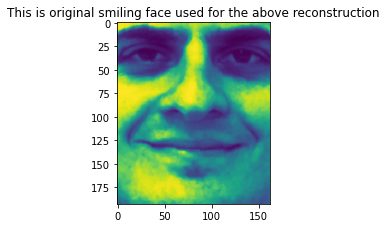

In [13]:
# Original Image for reference
plt.subplot(1,2,1)
plt.imshow((T_test).reshape((193, 162)))
plt.title("This is original smiling face used for the above reconstruction")

(190, 1)


Text(0.5, 1.0, 'Mean Squared Error')

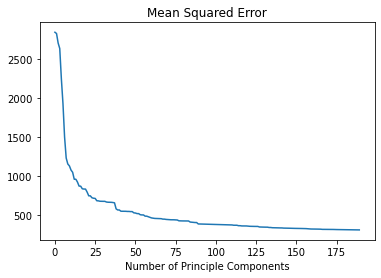

In [14]:
error = mean_squared_error(T_test, eigen_faces,mean)
print(error.shape)
plt.plot(error)
plt.title("Mean Squared Error - Similing Face")
plt.xlabel("Number of Principle Components")
plt.title("Mean Squared Error")

## Part D
**Question:** 

Reconstruct one of the other 10 individuals’ neutral expression image using different number of PCs. Again, plot the MSE of reconstruction versus the number of principal components and comment on your result.

**My Explanation:**

I choose 200th image among the neutral faces to reconstruct using different PCs. Below are the Reconstructed Images using PCs = [25,50,80,100,150,190], and the method described above for the reconstruction. 

As it can be seen from the images, as the principal components used to recontruct the images increase, the Mean Squared Error Decreases and the images start look more and more like the original Image. 

In this case, however, when the Principal components were computed only the first `190` Neutral Faces. Hence trying to reconstruct a neutral face thats not in this set gives little higher error as expected as well as the images are close approximation instead of being identical when PCs = 190. Basically, the reconsturction is not as accurate as it would be for one of the first 190 images. 

Just like other parts above,as we use more and more Principal Components, Error decreases and the image starts looking closer to the original. 

Original Image Shape:  (31266, 1)
Mean_vector shape:  (31266, 1)
(31266, 1)


Text(0.5, 1.0, 'Reconstructed using 190 PCs')

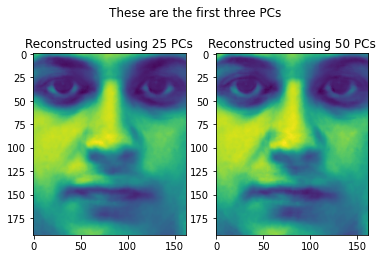

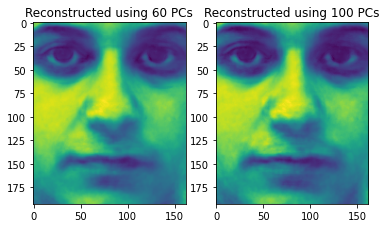

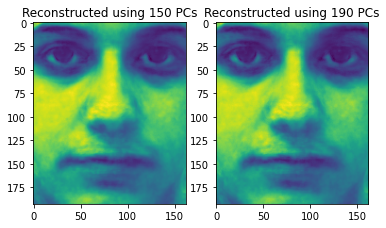

In [15]:
T_test = neutral_faces[:,199].reshape((mean.shape[0],mean.shape[1]))
print("Original Image Shape: ",T_test.shape )
print("Mean_vector shape: ", mean.shape)


## Reconstructed Images with 25 and 50 PCs
fig,(ax1,ax2) = plt.subplots(1,2)
fig.suptitle('These are the first three PCs')
T_hat = recontruction(T_test, 25, eigen_faces,mean)
print(T_hat.shape)
ax1.imshow((T_hat).reshape((193, 162)))
ax1.set_title("Reconstructed using 25 PCs")

T_hat = recontruction(T_test, 50, eigen_faces,mean)
ax2.imshow((T_hat).reshape((193, 162)))
ax2.set_title("Reconstructed using 50 PCs")

## Reconstructed Images with 80 and 100 PCs
fig,(ax3,ax4) = plt.subplots(1,2)
T_hat = recontruction(T_test, 60, eigen_faces,mean)
ax3.imshow((T_hat).reshape((193, 162)))
ax3.set_title("Reconstructed using 60 PCs")

T_hat = recontruction(T_test, 100, eigen_faces,mean)
ax4.imshow((T_hat).reshape((193, 162)))
ax4.set_title("Reconstructed using 100 PCs")

## Reconstructed Images with 80 and 100 PCs
fig,(ax5,ax6) = plt.subplots(1,2)
T_hat = recontruction(T_test, 150, eigen_faces,mean)
ax5.imshow((T_hat).reshape((193, 162)))
ax5.set_title("Reconstructed using 150 PCs")

T_hat = recontruction(T_test, 190, eigen_faces,mean)
ax6.imshow((T_hat).reshape((193, 162)))
ax6.set_title("Reconstructed using 190 PCs")

Text(0.5, 1.0, 'This is original neutral face used for the above reconstruction')

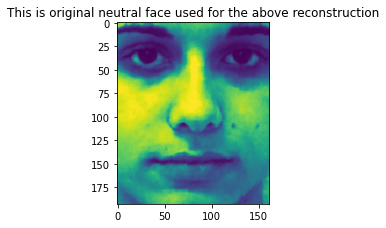

In [16]:
# Original Image for reference
plt.subplot(1,2,1)
plt.imshow((T_test).reshape((193, 162)))
plt.title("This is original neutral face used for the above reconstruction")

(190, 1)


Text(0.5, 1.0, 'Mean Squared Error')

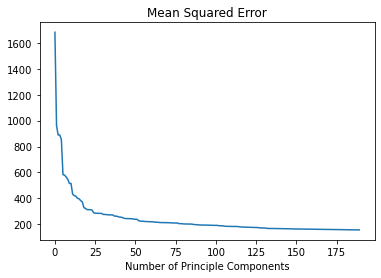

In [17]:
error = mean_squared_error(T_test, eigen_faces,mean)
print(error.shape)
plt.plot(error)
plt.title("Mean Squared Error - 200th Image")
plt.xlabel("Number of Principle Components")
plt.title("Mean Squared Error")

## Part E
**Question:** 

Use any other non-human image (e.g., car image, resize and crop to the same size), and try to reconstruct it using all the PCs. Comment on your results.

**My Explanation:**
*Some Citation  
Found my image here:https://www.evoximages.com/stock-image-database-ec 
Used this website to resize my image: https://resizeimage.net/ *

I first loaded the resized image using the same method used at the beginning of this code. Then used the reconstruction function with all 190 PCs to reconstruct the car image. 

As expected, the reconstruction of the car image cannot be closely communted even with all the Principal components. This is mainly because when the Principal components were computed, only the Neutral Faces were used. It did not incude any other types of images. Therefore, the componenets have different features of a human face and not any other object or animal or any other sort of images. To accurately reconstructed a car image, we will probably need a whole dataset of car or if its an animal like dog, we will need a dog dataset etc. 

In this case, the MSE is also very high as expected!  

Text(0.5, 1.0, 'Reconstructed Car using 190 PCs')

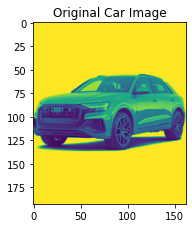

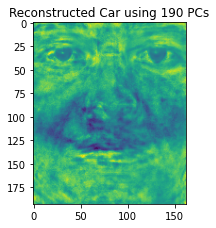

In [18]:
# Importing the car Image
p = Image.open("resizeimage2.png").convert('L')        
size = p.size 
p = np.array(p)
car_img = np.zeros((1,31266))
car_img[0,:] = p.reshape(size[0] * size[1])
car_img = np.transpose(car_img)
plt.subplot(1,2,1)
plt.imshow((car_img).reshape((193, 162)))
plt.title("Original Car Image")


## Reconstructed Images with 190 PCs
fig,ax1 = plt.subplots(1,1)
T_hat = recontruction(car_img, 190, eigen_faces,mean)
# print(T_hat.shape)
# ax1.imshow((T_hat).reshape((193, 162)))
# ax1.set_title("Reconstructed Car using 190 PCs")
plt.subplot(1,2,2)
plt.imshow((T_hat).reshape((193, 162)))
plt.title("Reconstructed Car using 190 PCs")

(190, 1)


Text(0.5, 1.0, 'Mean Squared Error')

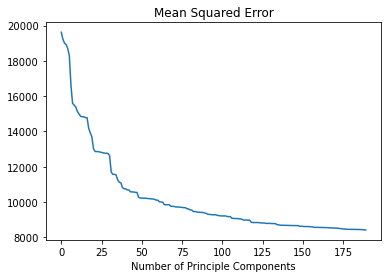

In [19]:
error = mean_squared_error(car_img, eigen_faces,mean)
print(error.shape)
plt.plot(error)
plt.title("Mean Squared Error - 200th Image")
plt.xlabel("Number of Principle Components")
plt.title("Mean Squared Error")

## Part F
**Question:** 

Rotate one of 190 individuals’ neutral expression image with different degrees and try to reconstruct it using all PCs. Comment on your results.

**My Explanation:**

I choose the very first image among the smiling faces to reconstruct using different PCs. Below are the Reconstructed Images using PCs = [25,50,80,100,150,190], and the method described above for the reconstruction. 

As it can be seen from the images, as the principal components used to recontruct the images increase, the Mean Squared Error Decreases and the images start look more and more like the original Image. 

In this case, however, since when the Principal components were computed, only the Neutral Faces were used. Hence trying to reconstruct a smiling face will gives higher error as expected as well as the images are close approximation instead of being identical when PCs = 190. 

Moreover, For Part B, we only really needed 50-60 PCs to accurately reconstruct the original images, but for smiling faces we will probably need more Principal Components, probably up to 150 or more. 

Text(0.5, 1.0, 'Rotated image at 180 degrees')

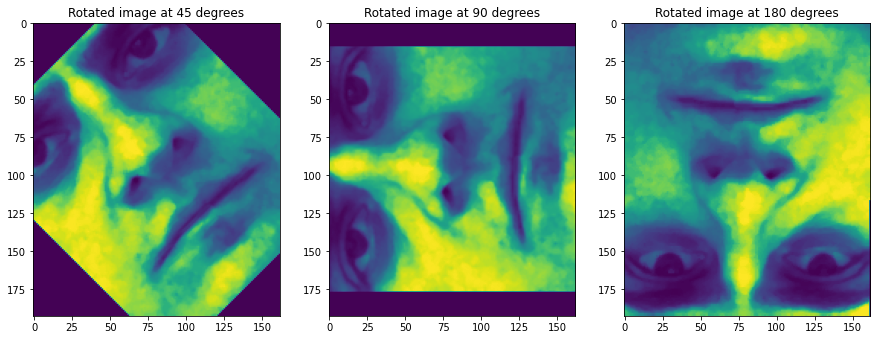

In [25]:
from scipy import ndimage
rotated_image = neutral_faces[:,0].reshape((193,162))
rotated_image_45 = ndimage.rotate(rotated_image,45,reshape = False)
rotated_image_90 = ndimage.rotate(rotated_image,90,reshape = False)
rotated_image_180 = ndimage.rotate(rotated_image,180,reshape = False)


plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow((rotated_image_45).reshape((193, 162)))
plt.title("Rotated image at 45 degrees")
plt.subplot(1,3,2)
plt.imshow((rotated_image_90).reshape((193, 162)))
plt.title("Rotated image at 90 degrees")
plt.subplot(1,3,3)
plt.imshow((rotated_image_180).reshape((193, 162)))
plt.title("Rotated image at 180 degrees")

In [30]:
def all_plot_for_different_PC(T_test,eigen_faces,mean):
    plt.figure(figsize=(15,15))
    plt.subplot(3,3,1)
    T_hat = recontruction(T_test, 10, eigen_faces,mean)
    plt.imshow((T_hat).reshape((193, 162)))
    plt.title("Reconstructed using 10 PCs")

    plt.subplot(3,3,2)
    T_hat = recontruction(T_test, 15, eigen_faces,mean)
    plt.imshow((T_hat).reshape((193, 162)))
    plt.title("Reconstructed using 15 PCs")


    plt.subplot(3,3,3)
    T_hat = recontruction(T_test, 50, eigen_faces,mean)
    plt.imshow((T_hat).reshape((193, 162)))
    plt.title("Reconstructed using 50 PCs")

    plt.subplot(3,3,4)
    T_hat = recontruction(T_test, 60, eigen_faces,mean)
    plt.imshow((T_hat).reshape((193, 162)))
    plt.title("Reconstructed using 60 PCs")


    plt.subplot(3,3,5)
    T_hat = recontruction(T_test, 90, eigen_faces,mean)
    plt.imshow((T_hat).reshape((193, 162)))
    plt.title("Reconstructed using 90 PCs")

    plt.subplot(3,3,6)
    T_hat = recontruction(T_test, 100, eigen_faces,mean)
    plt.imshow((T_hat).reshape((193, 162)))
    plt.title("Reconstructed using 100 PCs")

    plt.subplot(3,3,7)
    T_hat = recontruction(T_test, 150, eigen_faces,mean)
    plt.imshow((T_hat).reshape((193, 162)))
    plt.title("Reconstructed using 150 PCs")

    plt.subplot(3,3,8)
    T_hat = recontruction(T_test, 175, eigen_faces,mean)
    plt.imshow((T_hat).reshape((193, 162)))
    plt.title("Reconstructed using 175 PCs")

    plt.subplot(3,3,9)
    T_hat = recontruction(T_test, 190, eigen_faces,mean)
    plt.imshow((T_hat).reshape((193, 162)))
    plt.title("Reconstructed using 190 PCs")

Original Image Shape:  (31266, 1)
Mean_vector shape:  (31266, 1)


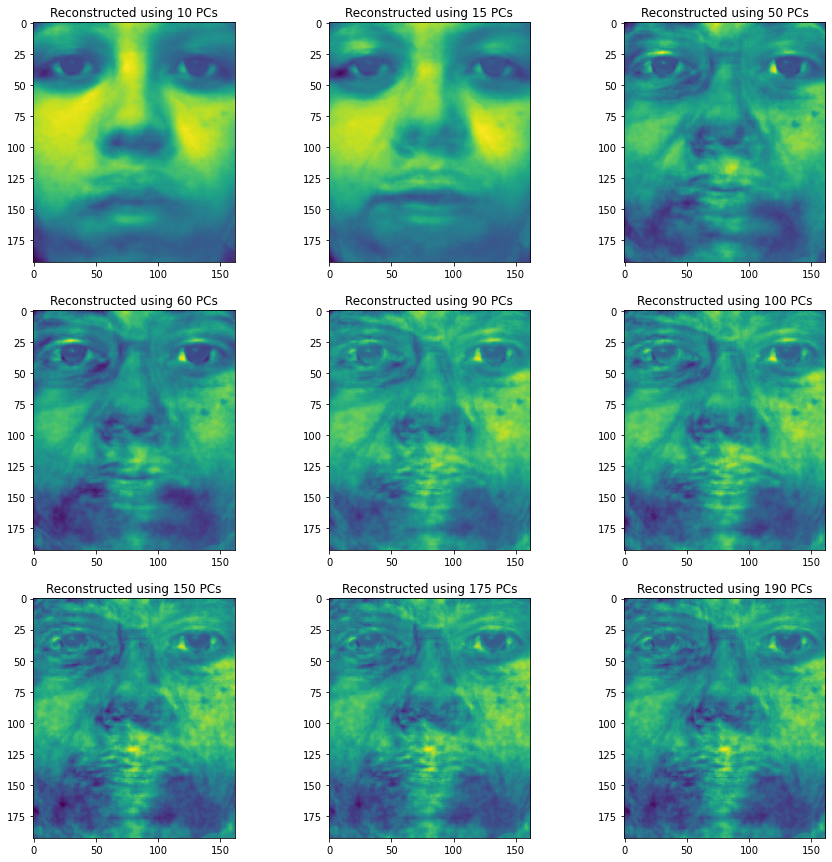

In [31]:
T_test = rotated_image_180.reshape((mean.shape[0],mean.shape[1]))
print("Original Image Shape: ",T_test.shape )
print("Mean_vector shape: ", mean.shape)
all_plot_for_different_PC(T_test,eigen_faces,mean)

(190, 1)


Text(0.5, 1.0, 'Mean Squared Error')

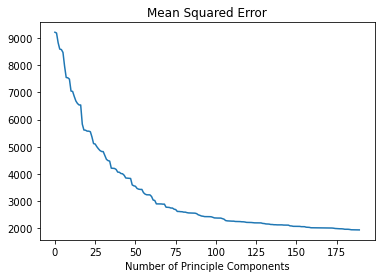

In [32]:
error = mean_squared_error(T_test, eigen_faces,mean)
print(error.shape)
plt.plot(error)
plt.title("Mean Squared Error - 200th Image")
plt.xlabel("Number of Principle Components")
plt.title("Mean Squared Error")

# Stuff 

In [ ]:
## other eigen face stuff 
[D,V] = np.linalg.eig(cov) # D is eigenvalues and V is eigenvectors
# print("V shape = ", V.shape)
eigen_faces = np.dot(Zero_centered_T,V)
print("V shape 1 = ", eigen_faces.shape)
eigen_faces /= np.linalg.norm(eigen_faces,axis = 0)
# print("V shape 2 = ", eigen_faces.shape)

idx = D.argsort()[::-1] 
sort_eigval = D[idx]
print("eigval = ",sort_eigval.shape)
sort_eigfaces = eigen_faces[:,idx]
# print(sort_eigfaces.shape)
## Compare 
# print(np.array_equal(u,sort_eigfaces))
print(np.array_equal(s,sort_eigval))
# print(sort_eigfaces)
# print("s = ", s )
# print("eigval = ",sort_eigval)

In [ ]:
bu = np.dot(Zero_centered_T,u)
print(bu.shape)
bu /= np.linalg.norm(bu,axis = 0)
print("bu : ")
print (bu)
# print("vh = ")
# print(vh)

In [ ]:
vhn = np.dot(vh,np.transpose(Zero_centered_T))
vhn /= np.linalg.norm(vhn,axis = 0)
print(vh)

In [ ]:
test = np.array([[1.0,0.0], [2.0,2.0], [2.0,6.0], [4.0,7.0]])
# print("test first:", test)
test = np.transpose(test)
print(test)
test /= np.linalg.norm(test,axis = 0)
print(test)
size_Test = test.shape
# print(test[:,0:3])
wow = np.dot(test, np.ones([test.shape[1],1])) * (1/size_Test[1])
print(wow)
# print(np.ones([test.shape[1],1]))

# T = neutral_faces[:,0:190]
# size_T = T.shape
# print(size_T[0], size_T[1]) # [31266 190]

# # Find the mean
# mean = (( np.transpose(np.sum(T,axis = 1))).reshape(size_T[0],1))/size_T[1]
# avg = (1/size_T[1]) * np.dot(T, np.ones([size_T[1],1]))
# print(np.array_equal(avg,mean))

In [ ]:
print((np.transpose(np.sum(test,axis = 1))).reshape(2,1))
avg = (np.transpose(np.sum(test,axis = 1))).reshape(2,1)* (1/size_Test[1])
q = np.repeat(avg,size_Test[1], axis = 1)
print(avg)
# print("q = ", q)
# zero_avg = test - q
# print("original: ",zero_avg) 
# c = test - avg
# print("my mine: ", c)

test /= np.linalg.norm(test,axis = 0)
print(test)

In [ ]:
lt = [1 ,2 ,3]

for i in lt:
    print(i)

In [ ]:
# using the first image to for reconstruction neutral_faces[:,0] 
T_test = neutral_faces[:,0].reshape((mean.shape[0],mean.shape[1]))
print("Original Image Shape: ",T_test.shape )
print("Mean_vector shape: ", mean.shape)

i = 190
new_eigen_faces = eigen_faces[:,0:i]
print(new_eigen_faces.shape)

#weights 190 x 1
W = np.dot(np.transpose(new_eigen_faces), T_test - mean) 
print(W.shape)
T_hat = np.zeros([T_test.shape[0],T_test.shape[1]])
#T_hat = phi + mean
# get phi_f = sum(w_i * u_i)
v = np.dot(new_eigen_faces,W)
T_hat = v + mean
print(T_hat.shape)

plt.subplot(1,2,1)
plt.imshow((T_hat).reshape((193, 162)))
plt.title("Reconstructed")
plt.savefig('average_neutral_face.png')

In [ ]:
error = np.zeros([1,190]) 

In [ ]:
error.shape

In [ ]:
test1 = np.array([[4,4], [4,4]])
test2 = np.array([[2,2], [2,2]])
diff = test1 - test2
error1 = np.sum(np.square(diff))
error2 = np.sum(np.square(diff), axis = 0)
print(test1)
print(test2)
print("Payal: ", np.square(diff))
print("shiv: ", diff**2)
print("diff: ", diff)
print("error1: ", error1)
print("error2: ", error2)



In [ ]:
test = np.array([[4], [4]])
print(np.sum(test.shape))

In [ ]:
error = np.zeros([1,190])
error.shape

In [ ]:
def reconstruct(image, eigen_faces, mean): 
    
    image_shape = image.shape
    image = np.reshape(image, [image_shape[0], 1])
    weights = np.dot(np.transpose(eigen_faces), image - mean)
    reconstructed_image = np.zeros([eigen_faces.shape[0], eigen_faces.shape[1]]) 
    reconstructed_image[:,0] = weights[0] * eigen_faces[:,0]
    for i in range(1, weights.shape[0]):
        reconstructed_image[:,i] = reconstructed_image[:,i-1] + (weights[i] * eigen_faces[:, i])
    reconstructed_image = reconstructed_image + mean 
    repeats = np.repeat(image, weights.shape[0], axis = 1) 
    diff = reconstructed_image - repeats
    diff = np.square(diff)
    diff = np.sum(diff, axis = 0)
    diff = diff / eigen_faces.shape[0]
    print("this is i need know: ", eigen_faces.shape[0])
    print(diff.shape)
    plt.plot(diff)
    
                                                                                                    

In [ ]:
T_test = neutral_faces[:,0].reshape((mean.shape[0],mean.shape[1]))
reconstruct(T_test,eigen_faces,mean)

In [ ]:
for i in range(1,2):
    print(i)

**Announcements**
- something 
- somehitng else 

- somethging: 
    - hello 
    - hi 
    - hey


A brief note about Markdown. It's a way to specify all formatting within the text itself. 

For example, italicized text can be specified with an _underscore_ or *single asterisks*.

Bold text requires __two underscores__ or **two asterisks**.


<h1><center>ECE 269 Final Project: Face Recognition Using principle Component Analysis</center></h1> 
<h2><center> By Shivani Bhakta </center></h2> 

<p> This project is an implementation of the following paper:  
<b>M. A Turk and A. P. Pentland, “Face Recognition Using Eigenfaces", Proceedings of IEEECVPR 1991.</b>    
In this project, we use priciple component analyis (PCA) for Face Recognition. </p>

In [ ]:
test = np.array([[1.0,0.0], [2.0,2.0], [2.0,6.0], [4.0,7.0]])
print(test)

In [ ]:
test.flatten()

In [ ]:
test = test.flatten()

In [ ]:
print(test)

In [ ]:
car_img = np.zeros((1,31266))
    
p = Image.open("1a.jpg")        
size = p.size 
p = np.array(p) 
car_img[0,:] = p.reshape(size[0] * size[1])
car_img = np.transpose(car_img)
plt.subplot(1,2,1)
plt.imshow((car_img).reshape((193, 162)))